In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_yolo():
	weight_path="/content/drive/MyDrive/train/weights/yolov3_last.weights"
	cfg_path="/content/drive/MyDrive/train/yolov3 (1).cfg"
	net = cv2.dnn.readNet(weight_path,cfg_path)
	classes = []
	with open("/content/drive/MyDrive/train/classes.names", "r") as f:
		classes = [line.strip() for line in f.readlines()] 
	
	output_layers = [layer_name for layer_name in net.getUnconnectedOutLayersNames()]
	#colors = np.random.uniform(0, 255, size=(len(classes), 3))
	return net, classes, output_layers

In [ ]:
def load_image(img_path):
	# image loading
	img = cv2.imread(img_path);
	img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
	#img = cv2.resize(img, None, fx=0.4, fy=0.4)
	#img=cv2.resize(img,(608,608))
	height, width, channels = img.shape
	#plt.imshow(img);plt.show()
	return img, height, width, channels

In [ ]:
def detect_objects(img, net, outputLayers):			
	blob = cv2.dnn.blobFromImage(img, scalefactor=1/255, size=(320, 320), mean=(0, 0, 0), swapRB=True, crop=False)
	net.setInput(blob)
	outputs = net.forward(outputLayers)
	return blob, outputs

In [ ]:
def get_box_dimensions(outputs, height, width):
	boxes = []
	confs = []
	class_ids = []
	for output in outputs:
		for detect in output:
			scores = detect[5:]
			class_id = np.argmax(scores)
			conf = scores[class_id]
			if conf > 0.3:
				center_x = int(detect[0] * width)
				center_y = int(detect[1] * height)
				w = int(detect[2] * width)
				h = int(detect[3] * height)
				x = int(center_x - w/2)
				y = int(center_y - h / 2)
				boxes.append([x, y, w, h])
				confs.append(float(conf))
				class_ids.append(class_id)
	return boxes, confs, class_ids

In [ ]:
def write_output_to_file(name,boxes, confs, colors, class_ids, classes):
  indexes = cv2.dnn.NMSBoxes(boxes, confs, 0.5, 0.4)
  #font = cv2.FONT_HERSHEY_PLAIN
  #print(indexes)
  l=[name]
  for i in range(len(boxes)):
      if i in indexes:
          x, y, w, h = boxes[i]
          label = str(classes[class_ids[i]]);
          l.append([label,x,y,w,h])
  return l

In [ ]:
def draw_labels(name,boxes, confs,  class_ids, classes, img): 
	indexes = cv2.dnn.NMSBoxes(boxes, confs, 0.5, 0.4)
	font = cv2.FONT_HERSHEY_SIMPLEX
	#print(indexes)
	for i in range(len(boxes)):
		if i in indexes:
			x, y, w, h = boxes[i]
			label = str(classes[class_ids[i]])
			#color = colors[i]
			color=(0,255,0)
			cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
			cv2.putText(img, label+" "+str(round(confs[i],2)), (x, y - 5), font, 2, color, 7)
	img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
	path="/content/drive/MyDrive/test1/bbox_test_images1/"
	cv2.imwrite((os.path.join(path,name)),img) 

	#plt.imshow(img)
    
	#plt.show()
	#return img


In [ ]:
def image_detect(img_path): 
	name=img_path.split("/")[-1]
	model, classes, output_layers = load_yolo()
	image, height, width, channels = load_image(img_path)
	blob, outputs = detect_objects(image, model, output_layers)
	boxes, confs, class_ids = get_box_dimensions(outputs, height, width)
	draw_labels(name,boxes, confs, class_ids, classes, image)
	#return write_output_to_file(name,boxes, confs, colors, class_ids, classes)
	"""while True:
		key = cv2.waitKey(1)
		if key == 27:
			break"""

In [ ]:
#colors = np.random.uniform(0, 255, size=(21, 3))
images=glob.glob(os.path.join("/content/drive/MyDrive/test1/test","*.jpg"))

In [ ]:
colors

In [ ]:
print(len(images))

500


In [ ]:
for x in images:
  image_detect(x)

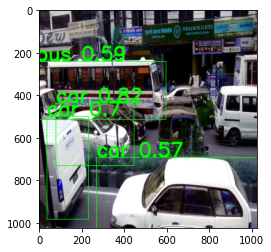

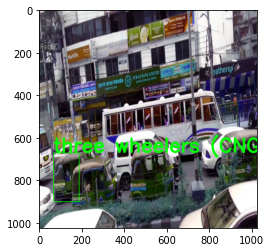

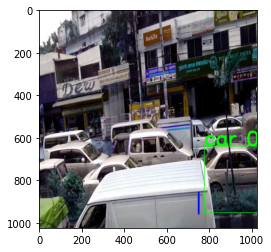

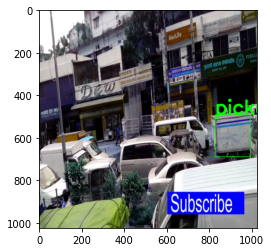

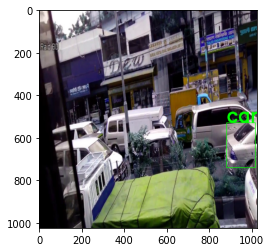

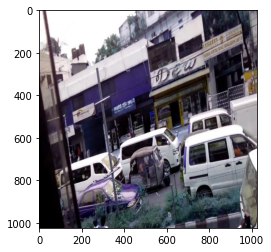

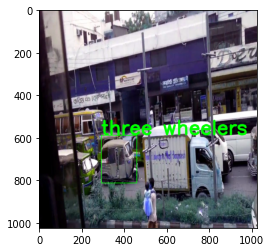

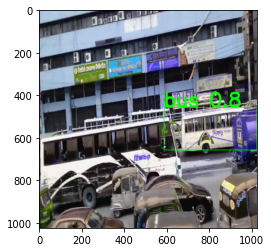

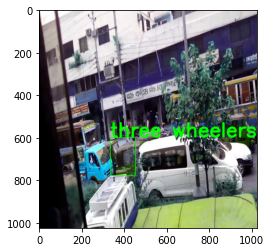

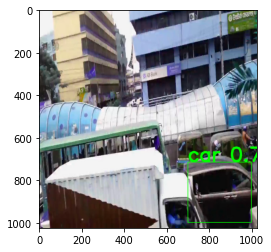

In [ ]:
result1=[]
for i in range(40,50):
  x=images[i]
  image_detect(x)

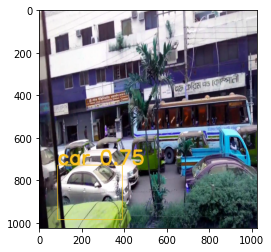

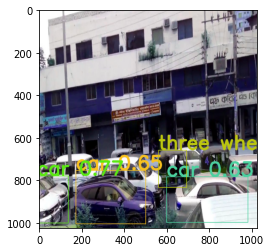

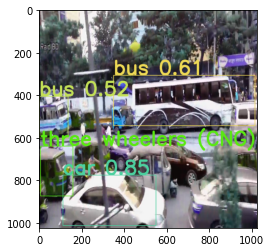

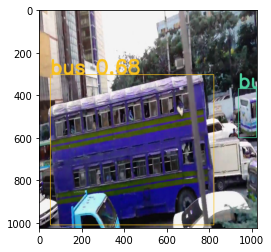

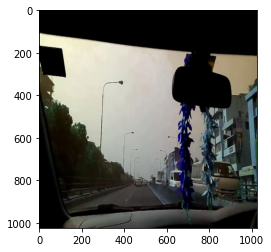

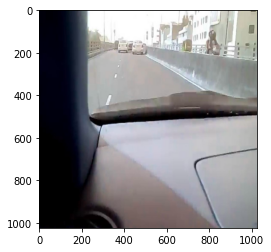

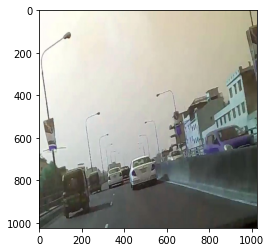

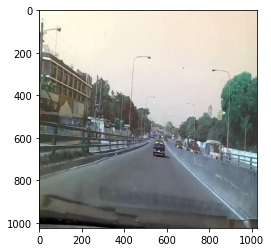

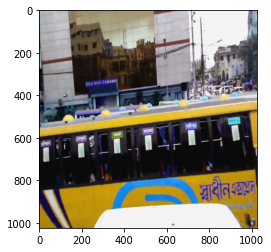

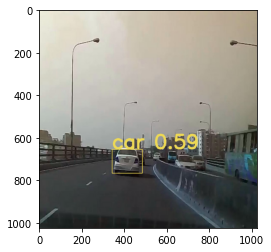

In [ ]:
for i in range(50,60):
  x=images[i]
  image_detect(x)

In [ ]:
result

[['Sabiha_(17)_jpg.rf.8ce702e750002516c990f17209c28900.jpg'],
 ['Sabiha_(18)_jpg.rf.2d99bbe6021834328af969e718d6b5df.jpg',
  ['car', 24, 747, 244, 242],
  ['car', 365, 791, 563, 212],
  ['three wheelers (CNG)', 443, 651, 195, 157],
  ['three wheelers (CNG)', 702, 658, 197, 262],
  ['car', 942, 733, 85, 317]],
 ['Sabiha_(19)_jpg.rf.ded17b8863c2c0764d17b91e96012be0.jpg',
  ['car', -27, 780, 361, 208],
  ['car', 283, 727, 407, 275],
  ['car', 160, 711, 215, 184]],
 ['Sabiha_(2)_jpg.rf.f68dcb552bc0b6c87c5e44f91499addc.jpg',
  ['car', 10, 682, 293, 211],
  ['pickup', 224, 722, 415, 295],
  ['car', 687, 728, 328, 240],
  ['pickup', 15, 496, 150, 164]],
 ['Sabiha_(20)_jpg.rf.b3e6da0d8305a75df41638fcebe4c384.jpg',
  ['car', -10, 654, 302, 255],
  ['car', 203, 744, 436, 257],
  ['three wheelers (CNG)', 895, 564, 128, 215],
  ['three wheelers (CNG)', 477, 611, 192, 222],
  ['three wheelers (CNG)', 705, 635, 240, 331]],
 ['Sabiha_(22)_jpg.rf.93d244c57f2f22e50cb4840e3c985f84.jpg',
  ['three wheele

[['sabiha(207)_jpg.rf.a5298babcd79934f0d72078b1483e6c7.jpg'],
 ['sabiha(208)_jpg.rf.5b31b464f746c4912b2ee852539c35da.jpg'],
 ['sabiha(211)_jpg.rf.83db11272a5a56242934163b6af982e4.jpg',
  ['car', 884, 782, 139, 126]],
 ['sabiha(213)_jpg.rf.b7581c97308c651ac437829e21187f4b.jpg',
  ['bus', 635, 616, 204, 163],
  ['car', 573, 677, 95, 93],
  ['three wheelers (CNG)', 866, 695, 90, 106]],
 ['sabiha(212)_jpg.rf.7e503a44fcc7ee0d5c672a278d09d497.jpg'],
 ['sabiha(214)_jpg.rf.b30437ee0cb1d606f6b92c00de60226a.jpg',
  ['car', 156, 723, 21, 24]],
 ['sabiha(216)_jpg.rf.5d27346a36a96740faf0ee618552d435.jpg',
  ['car', 94, 586, 187, 213]],
 ['sabiha(215)_jpg.rf.4b4fbba8c4633296885b912a5ed96344.jpg',
  ['minivan', 13, 486, 147, 428],
  ['car', 223, 640, 30, 26]],
 ['sabiha(217)_jpg.rf.54d810b7bf37793f9ba3940005f26a8c.jpg',
  ['car', 227, 577, 102, 144]],
 ['sabiha(218)_jpg.rf.0a07c8c9db922047b71b619cbc80d021.jpg',
  ['car', 261, 661, 55, 119]],
 ['sabiha(219)_jpg.rf.b942e8a426cc363ac26410c9ca06d7f5.jpg'

In [ ]:
j=10
for i in range(410,420):
  for x in result1[j]:
    print(x)
  img=cv2.imread(images[i])
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  
  j+=1

NameError: ignored